# Creating learning data by combining animation with mouse curves

In [8]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

In [3]:
#common  rutines 
from Learning.data_cleaning import *

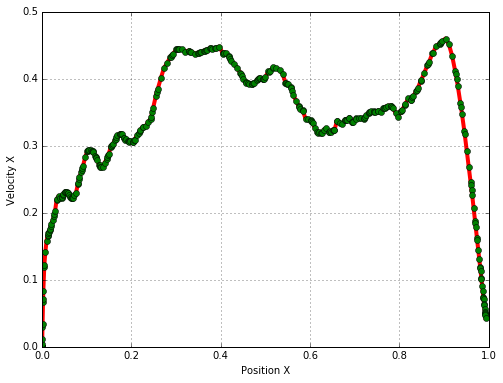

In [5]:
plot_horizontal_data(parse_mouse_data("./MouseCurvesRaw/Curve_PD_Friction_Left2Right_Slow.txt"))

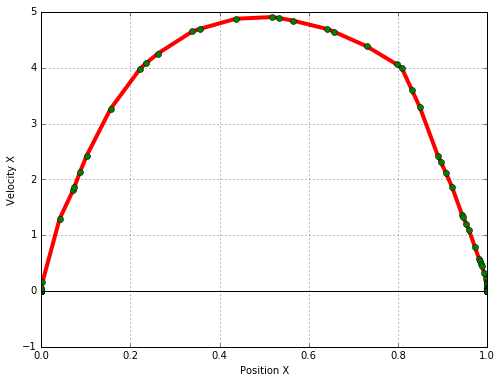

In [41]:
plot_horizontal_data(parse_mouse_data("./MouseCurvesRaw/Curve_PD_Friction_Left2Right_Fast.txt"))

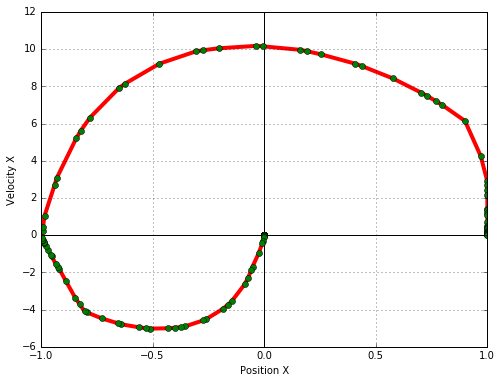

In [42]:
plot_horizontal_data(parse_mouse_data("./MouseCurvesRaw/Curve_PD_Friction_Right2Left_Left2RightComplete_Fast.txt"))

## From here try to clean normalised data

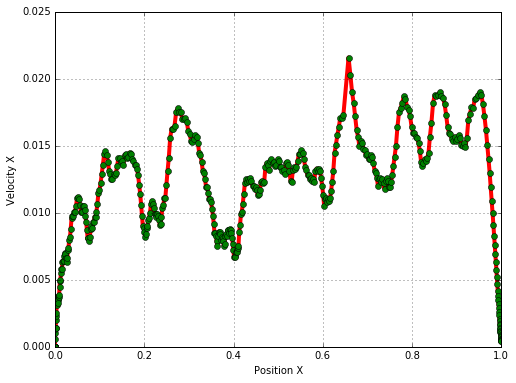

In [5]:
plot_horizontal_data(parse_mouse_data("./MouseCurvesRaw/Normalised_PD_Center_Right_Slow.txt"))

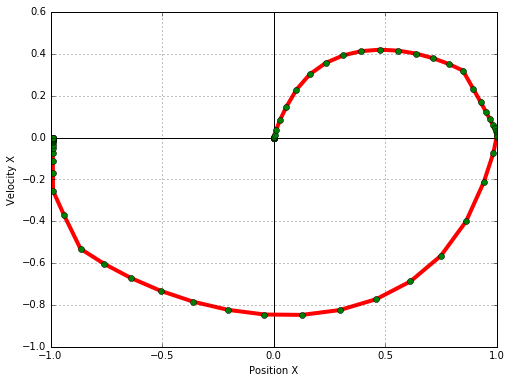

In [6]:
plot_horizontal_data(parse_mouse_data("./MouseCurvesRaw/Normalised_PD_Center_Right_Left_Fast.txt"))

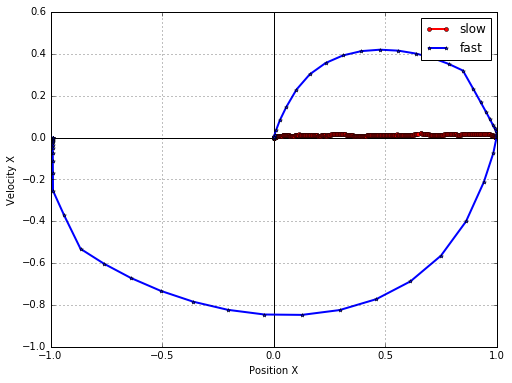

In [7]:
center_right_slow = parse_mouse_data("./MouseCurvesRaw/Normalised_PD_Center_Right_Slow.txt")
center_right_left_fast = parse_mouse_data("./MouseCurvesRaw/Normalised_PD_Center_Right_Left_Fast.txt")
compare_mouse_curves(center_right_slow, center_right_left_fast, "slow", "fast")

In [2]:
def get_first_id(mouse_data, criteria):
    return next(n for n, r in enumerate(mouse_data) if criteria(r))

## Clear center_right_slow attack

position is bigger than 0.0 starting from 22
position is bigger than 0.0 starting from 454
original length 457
size of pruned data 432


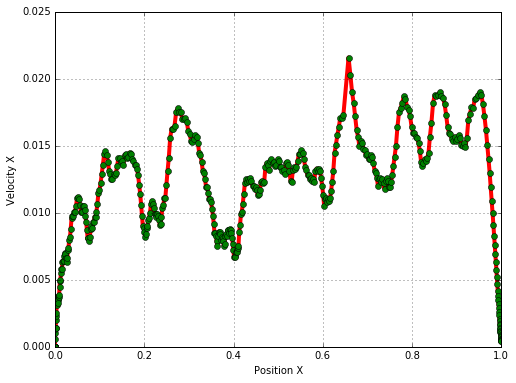

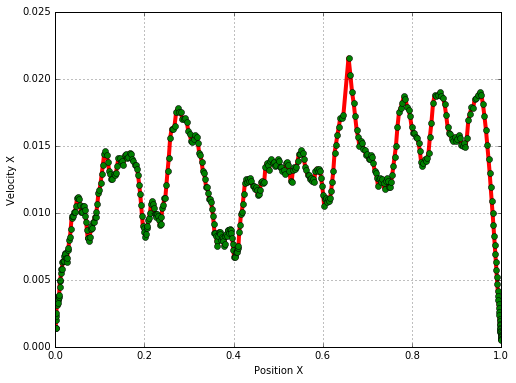

In [9]:
center_right_slow = parse_mouse_data("./MouseCurvesRaw/Normalised_PD_Center_Right_Slow.txt")

start_id = get_first_id(center_right_slow, lambda r: r[MPX] > 0.001)
print "position is bigger than 0.0 starting from", start_id
end_id = get_first_id(center_right_slow, lambda r: r[MPX] > 0.999)
print "position is bigger than 0.0 starting from", end_id

#removing tails from data
center_right_slow_pruned = center_right_slow[start_id:end_id]
print "original length", len(center_right_slow)
print "size of pruned data", len(center_right_slow_pruned)

plot_horizontal_data(center_right_slow)
plot_horizontal_data(center_right_slow_pruned)

Has to redo mouse capture because biding to the timestap is needed for alignment with the data

In [1]:
%pylab inline

from matplotlib import pyplot as plt
from matplotlib import animation
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\'

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim, fps=120):
    if not hasattr(anim, '_encoded_video'):
        anim.save("test.mp4", fps=fps, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])

        video = open("test.mp4","rb").read()

    anim._encoded_video = video.encode("base64")
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim, fps=120):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim, fps=fps))

Populating the interactive namespace from numpy and matplotlib


In [19]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

from Learning.data_cleaning import get_segment_anim_data
from vicon_anim_parser.scene_drawer import get_segments_anim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
segment_id2parent_id, header, anim_data = get_segment_anim_data("Ruslan.vsk", "./SwordMovements/sword_movements_01.csv")
half_length = len(anim_data) / 2
anim = get_segments_anim(anim_data[0:half_length], segment_id2parent_id, scene_length=800)
display_animation(anim)

In [58]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

from Learning.data_cleaning import get_segment_anim_data
from vicon_anim_parser.scene_drawer import get_segments_anim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
segment_id2parent_id, header, anim_data = get_segment_anim_data("Ruslan.vsk", "./SwordMovements/sword_movements_01.csv")
half_length = len(anim_data) / 2
print half_length
anim = get_segments_anim(anim_data[half_length:], segment_id2parent_id, scene_length=800, initial_frame=half_length + 1)
display_animation(anim)

3817
frame number 4000
frame number 4500
frame number 5000
frame number 5500
frame number 6000
frame number 6500
frame number 7000
frame number 7500


In [144]:
%load_ext autoreload
%autoreload 2

In [2]:
#common  rutines 
from Learning.data_cleaning import *

## Load Anim data

In [3]:
import numpy as np
import os
print "current path", os.getcwd()
segment_id2parent_id, header, anim_data = get_segment_anim_data("Ruslan.vsk", "./SwordMovements/sword_movements_01.csv")

current path C:\Users\Vicon\vsk_to_bvh_parser


In [6]:
import cPickle
cPickle.dump((segment_id2parent_id, header), open(".\\Learning\\data_horizontal\\skeleton_info", "w"))

## Note Center Right Slow
crs1 means center_right_slow_1

position is bigger than 0.0 starting from 18
position is bigger than 0.0 starting from 897
original length 922
size of pruned data 879


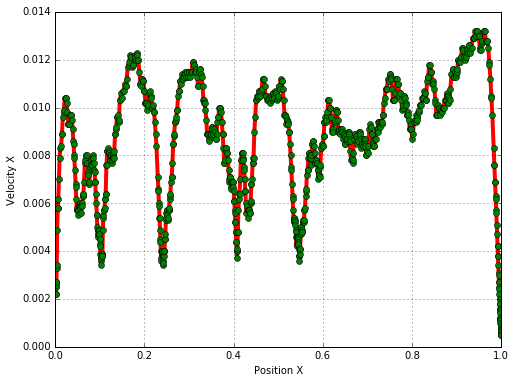

crs1 input  shape (285L, 2L)
crs1 output shape (285L, 87L)


In [183]:
#cleaning mouse data

center_right_slow = parse_mouse_data("./MouseCurvesRaw/normalised_center_right_slow.txt")
start_id = get_first_id(center_right_slow, lambda r: r[MPX] > 0.001)
print "position is bigger than 0.0 starting from", start_id
end_id = get_first_id(center_right_slow, lambda r: r[MPX] > 0.999)
print "position is bigger than 0.0 starting from", end_id

#removing tails from data
center_right_slow_pruned = center_right_slow[start_id:end_id]
print "original length", len(center_right_slow)
print "size of pruned data", len(center_right_slow_pruned)

plot_horizontal_data(center_right_slow_pruned)

In [204]:
display_animation(show_coupled_horizontal_data(anim_data[615:900], segment_id2parent_id, center_right_slow_pruned), fps=60)

In [205]:
#combining input and output
tmp = save_coupled_horizontal_data("center_right_slow1", center_right_slow_pruned, anim_data[615:900])

center_right_slow1 input  shape (285L, 2L)
center_right_slow1 output shape (285L, 87L)


## Note Right Center Slow
rcs1 means right_center_slow_1

position is bigger than 0.0 starting from 0
position is bigger than 0.0 starting from 585
original length 646
size of pruned data 585


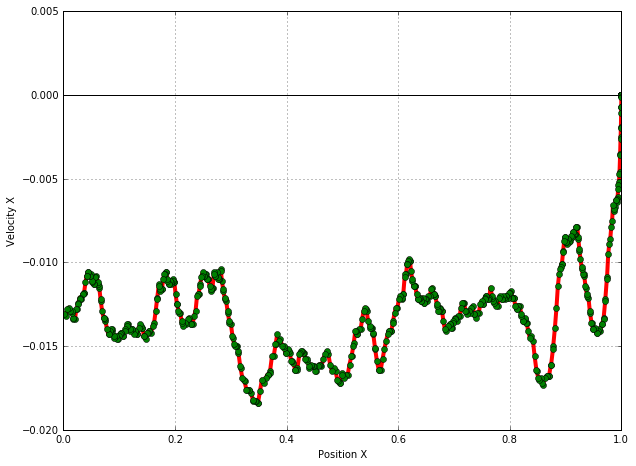

rcs1 input  shape (160L, 2L)
rcs1 output shape (160L, 87L)


In [53]:
#cleaning mouse data

right_center_slow = parse_mouse_data("./MouseCurvesRaw/normalised_right_center_slow.txt")
start_id = get_first_id(right_center_slow, lambda r: r[MPX] > 0.999)
print "position is bigger than 0.0 starting from", start_id
end_id = get_first_id(right_center_slow, lambda r: r[MPX] < 0.001)
print "position is bigger than 0.0 starting from", end_id

#removing tails from data
right_center_slow_pruned = right_center_slow[start_id:end_id]
print "original length", len(right_center_slow)
print "size of pruned data", len(right_center_slow_pruned)

plot_horizontal_data(right_center_slow_pruned)

In [178]:
display_animation(show_coupled_horizontal_data(anim_data[1450:1610], segment_id2parent_id, right_center_slow_pruned), fps=60)

In [206]:
tmp = save_coupled_horizontal_data("right_center_slow1", right_center_slow_pruned, anim_data[1450:1610])

right_center_slow1 input  shape (160L, 2L)
right_center_slow1 output shape (160L, 87L)


## Center Left Slow

position is bigger than 0.0 starting from 35
position is bigger than 0.0 starting from 1113
original length 1131
size of pruned data 1078


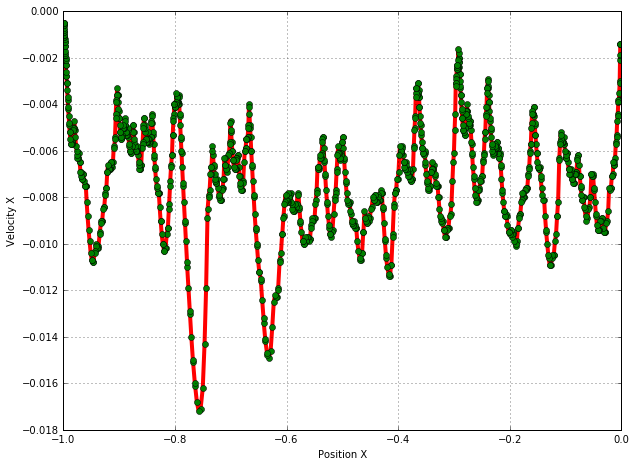

cls1 input  shape (120L, 2L)
cls1 output shape (120L, 87L)


In [54]:
#cleaning mouse data

center_left_slow = parse_mouse_data("./MouseCurvesRaw/normalised_center_left_slow.txt")
start_id = get_first_id(center_left_slow, lambda r: r[MPX] < -0.001)
print "position is bigger than 0.0 starting from", start_id
end_id = get_first_id(center_left_slow, lambda r: r[MPX] < -0.999)
print "position is bigger than 0.0 starting from", end_id
#plot_horizontal_data(center_left_slow)
# #removing tails from data
center_left_slow_pruned = center_left_slow[start_id:end_id]
print "original length", len(center_left_slow)
print "size of pruned data", len(center_left_slow_pruned)

plot_horizontal_data(center_left_slow_pruned)

In [177]:
display_animation(show_coupled_horizontal_data(anim_data[1040:1160], segment_id2parent_id, center_left_slow_pruned), fps=60)

In [208]:
tmp = save_coupled_horizontal_data("center_left_slow1", center_left_slow_pruned, anim_data[1040:1160])

center_left_slow1 input  shape (120L, 2L)
center_left_slow1 output shape (120L, 87L)


## Note Left Center Slow

position is bigger than 0.0 starting from 0
position is bigger than 0.0 starting from 705
original length 783
size of pruned data 705


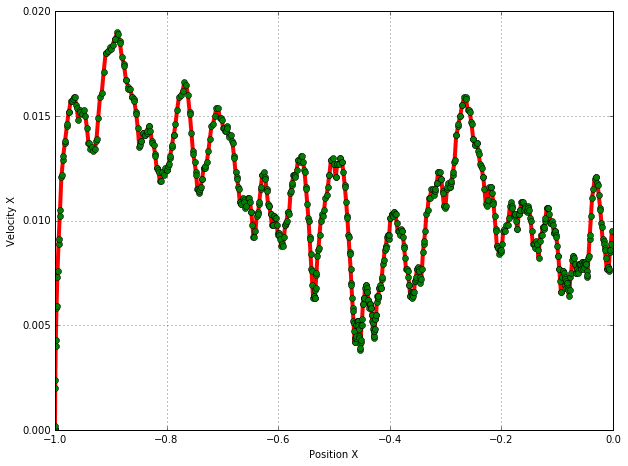

lcs1 input  shape (70L, 2L)
lcs1 output shape (70L, 87L)


In [56]:
#cleaning mouse data

left_center_slow = parse_mouse_data("./MouseCurvesRaw/normalised_left_center_slow.txt")
start_id = get_first_id(left_center_slow, lambda r: r[MPX] < -0.999)
print "position is bigger than 0.0 starting from", start_id
end_id = get_first_id(left_center_slow, lambda r: r[MPX] > -0.001)
print "position is bigger than 0.0 starting from", end_id
#removing tails from data
left_center_slow_pruned = left_center_slow[start_id:end_id]
print "original length", len(left_center_slow)
print "size of pruned data", len(left_center_slow_pruned)

plot_horizontal_data(left_center_slow_pruned)

In [175]:
display_animation(show_coupled_horizontal_data(anim_data[1160:1230], segment_id2parent_id, left_center_slow_pruned), fps=60)

In [207]:
tmp = save_coupled_horizontal_data("left_center_slow1", left_center_slow_pruned, anim_data[1160:1230])

left_center_slow1 input  shape (70L, 2L)
left_center_slow1 output shape (70L, 87L)


## Fast Motions 

### Slow Center Left Right Fast

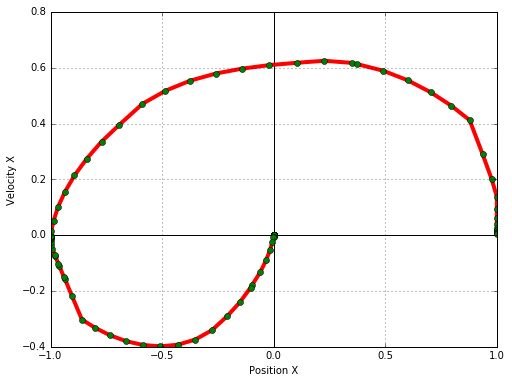

In [107]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6
slow_center_left_right_fast = parse_mouse_data("./MouseCurvesRaw/normalised_center_left_right_fast.txt")
plot_horizontal_data(slow_center_left_right_fast)

slow_center_left_fast_start 19 slow_center_left_fast_end 47


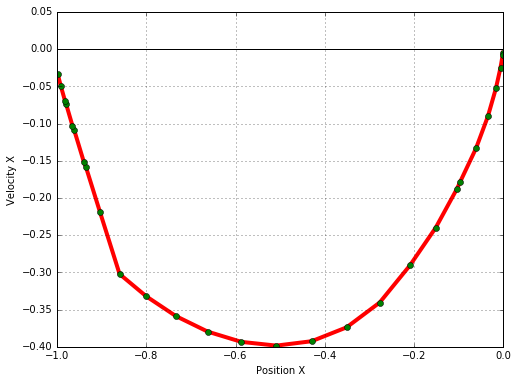

In [108]:
slow_center_left_fast_start = get_first_id(slow_center_left_right_fast, lambda r: r[MPX] < -0.001)
slow_center_left_fast_end   = get_first_id(slow_center_left_right_fast, lambda r: r[MPX] < -0.999)
print "slow_center_left_fast_start", slow_center_left_fast_start, "slow_center_left_fast_end", slow_center_left_fast_end

slow_center_left_fast = slow_center_left_right_fast[slow_center_left_fast_start:slow_center_left_fast_end]
plot_horizontal_data(slow_center_left_fast)

left_center_fast_end 21


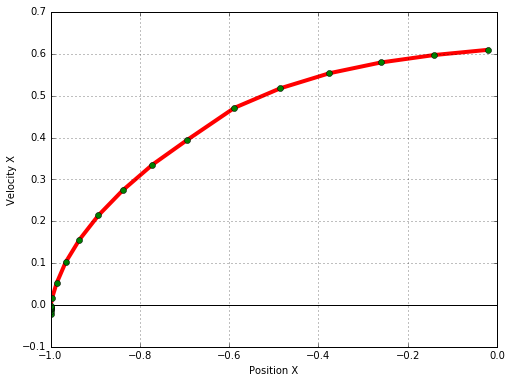

In [109]:
left_center_fast_start = slow_center_left_fast_end
left_center_fast_end = get_first_id(slow_center_left_right_fast[left_center_fast_start:], lambda r: r[MPX] > -0.001)
print "left_center_fast_end", left_center_fast_end

left_center_fast_raw = slow_center_left_right_fast[left_center_fast_start:][:left_center_fast_end]
plot_horizontal_data(left_center_fast_raw)

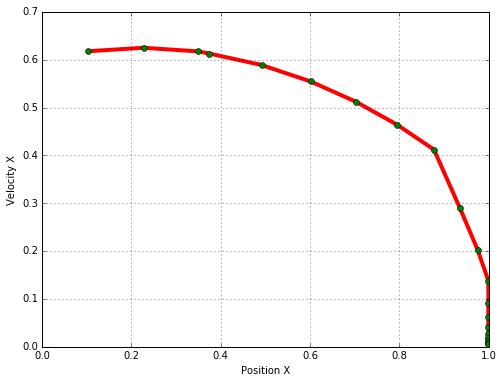

In [110]:
center_right_fast_raw = slow_center_left_right_fast[left_center_fast_start:][left_center_fast_end:]
plot_horizontal_data(center_right_fast_raw)

### Clean Fast Motions Center Left Right Fast

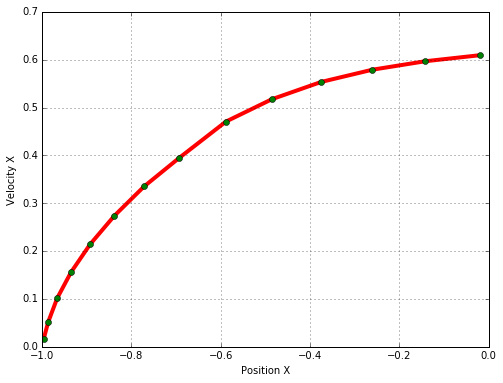

In [111]:
left_center_fast_nose = get_first_id(left_center_fast_raw, lambda r: r[MPX] > -0.999)
left_center_fast = left_center_fast_raw[left_center_fast_nose:]
plot_horizontal_data(left_center_fast)

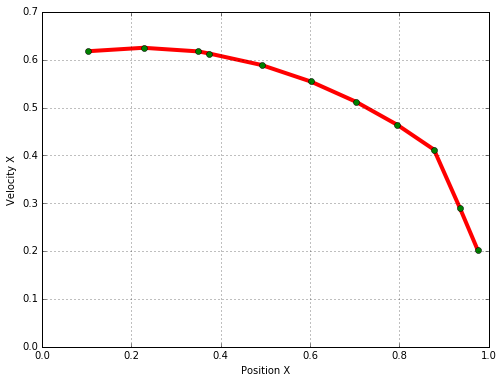

In [112]:
center_right_fast_tail = get_first_id(center_right_fast_raw, lambda r: r[MPX] > 0.9991)
center_right_fast = center_right_fast_raw[:center_right_fast_tail]
plot_horizontal_data(center_right_fast)

In [92]:
#tmp = save_coupled_horizontal_data("sclf1", center_left_fast, anim_data[1622:1800])

clf1 input  shape (178L, 2L)
clf1 output shape (178L, 87L)


#### Left Center Fast

In [215]:
display_animation(show_coupled_horizontal_data(anim_data[4245:4430], segment_id2parent_id, left_center_fast), fps=60)

In [216]:
tmp = save_coupled_horizontal_data("left_center_fast1", left_center_fast, anim_data[4245:4430])

left_center_fast1 input  shape (185L, 2L)
left_center_fast1 output shape (185L, 87L)


#### Center Right

In [219]:
display_animation(show_coupled_horizontal_data(anim_data[4430:4540], segment_id2parent_id, center_right_fast), fps=60)

In [220]:
tmp = save_coupled_horizontal_data("center_right_fast1", center_right_fast, anim_data[4430:4540])

center_right_fast1 input  shape (110L, 2L)
center_right_fast1 output shape (110L, 87L)


## Fast motions Slow Center Right Left Fast

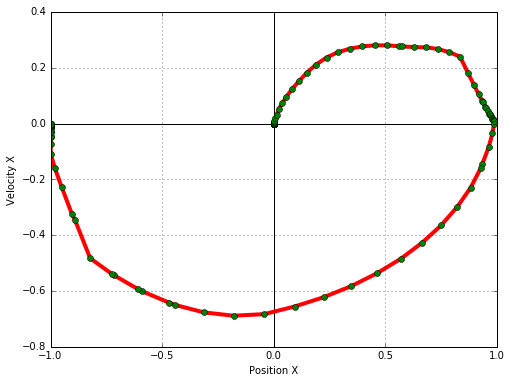

In [121]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6
slow_center_right_left_fast = parse_mouse_data("./MouseCurvesRaw/normalised_center_right_left_fast.txt")
plot_horizontal_data(slow_center_right_left_fast)

### Slow Center Right Fast

slow_center_right_fast_start 23 slow_center_right_fast_end 59


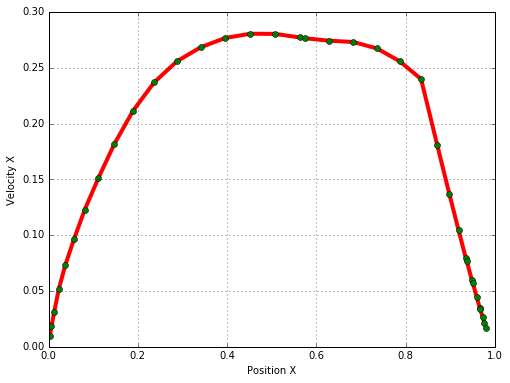

In [124]:
slow_center_right_fast_start = get_first_id(slow_center_right_left_fast, lambda r: r[MPX] > 0.001)
slow_center_right_fast_end   = get_first_id(slow_center_right_left_fast, lambda r: r[MPX] > 0.98)
print "slow_center_right_fast_start", slow_center_right_fast_start, "slow_center_right_fast_end", slow_center_right_fast_end 

slow_center_right_fast = slow_center_right_left_fast[slow_center_right_fast_start:slow_center_right_fast_end]
plot_horizontal_data(slow_center_right_fast)

In [185]:
display_animation(show_coupled_horizontal_data(anim_data[1622:1800], segment_id2parent_id, slow_center_right_fast), fps=60)

In [209]:
tmp = save_coupled_horizontal_data("slow_center_right_fast1", slow_center_right_fast, anim_data[1622:1800])

slow_center_right_fast1 input  shape (178L, 2L)
slow_center_right_fast1 output shape (178L, 87L)


### Right Center Fast Raw
plotted pruned variant

right_center_fast_end 18


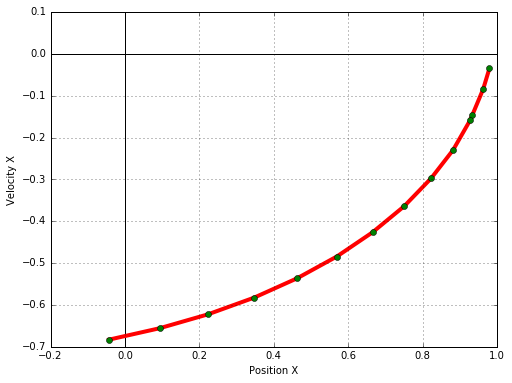

In [186]:
right_center_fast_start = slow_center_right_fast_end
right_center_fast_end = get_first_id(slow_center_right_left_fast[right_center_fast_start:], lambda r: r[MPX] < -0.1)
print "right_center_fast_end", right_center_fast_end

right_center_fast_raw = slow_center_right_left_fast[right_center_fast_start:][:right_center_fast_end]

def prune_right_center_fast(right_center_fast_raw):
    right_center_fast_nose = get_first_id(right_center_fast_raw, lambda r: r[MPX] < 0.98)
    return right_center_fast_raw[right_center_fast_nose:]

right_center_fast_pruned = prune_right_center_fast(right_center_fast_raw)
plot_horizontal_data(right_center_fast_pruned)

#### Show Right Center Fast Raw

In [188]:
display_animation(show_coupled_horizontal_data(anim_data[1810:1980], segment_id2parent_id, right_center_fast_raw), fps=60)

#### Show Right Center Fast Pruned

In [189]:
display_animation(show_coupled_horizontal_data(anim_data[1810:1980], segment_id2parent_id, right_center_fast_pruned), fps=60)

Raw variant looks better. Save raw.

In [210]:
tmp = save_coupled_horizontal_data("right_center_fast1", right_center_fast_raw, anim_data[1810:1980])

right_center_fast1 input  shape (170L, 2L)
right_center_fast1 output shape (170L, 87L)


### Center Left  Fast
display raw

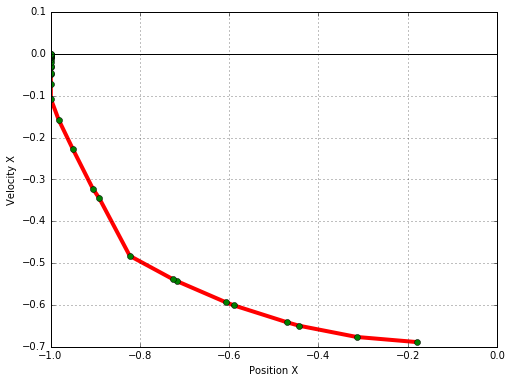

In [131]:
center_left_fast_raw = slow_center_right_left_fast[right_center_fast_start:][right_center_fast_end:]
plot_horizontal_data(center_left_fast_raw)

In [192]:
display_animation(show_coupled_horizontal_data(anim_data[1980:2060], segment_id2parent_id, center_left_fast_raw), fps=60)

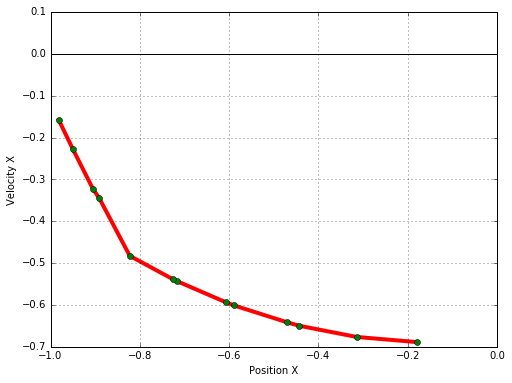

In [196]:
def prune_center_left_fast(center_left_fast):
    center_left_fast_nose = get_first_id(center_left_fast, lambda r: r[MPX] < -0.99)
    return center_left_fast[:center_left_fast_nose]

center_left_fast_pruned = prune_center_left_fast(center_left_fast_raw)
plot_horizontal_data(center_left_fast_pruned)

In [211]:
display_animation(show_coupled_horizontal_data(anim_data[1980:2060], segment_id2parent_id, center_left_fast_pruned), fps=60)

pruned variant is better. save it

In [212]:
tmp = save_coupled_horizontal_data("center_left_fast1", center_left_fast_pruned, anim_data[1980:2060])

center_left_fast1 input  shape (80L, 2L)
center_left_fast1 output shape (80L, 87L)
